In [1]:
%matplotlib inline

import random

import shapely.geometry as geom
import shapely.affinity as affine
import shapely.ops as ops
import shapely.wkt as wkt
import geopandas as gpd
import numpy as np

from tile_units import TileUnit
from tile_map import Tiling
from weave_units import WeaveUnit
from weave_grids import WeaveGrid
import tiling_utils

In [2]:
ak = gpd.read_file("../data/imd-auckland-2018.gpkg")

<AxesSubplot:>

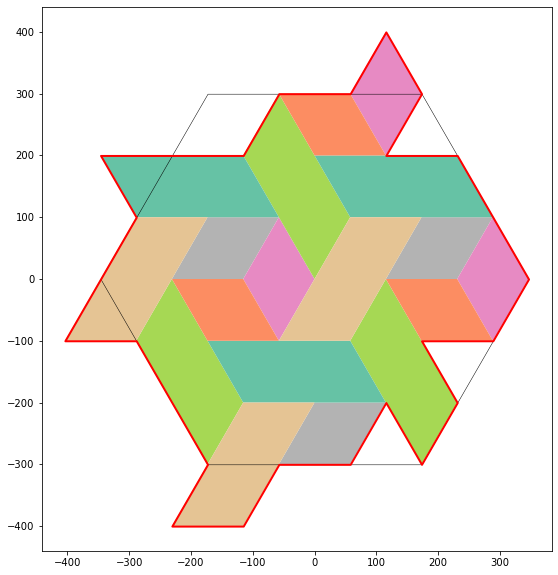

In [3]:
w1 = WeaveUnit(weave_type = "twill", n = 2, spacing = 500, aspect = 1,
               strands = "abcd-|efg-", crs = ak.crs)
w1 = WeaveUnit(weave_type = "cube", spacing = 100, aspect = 1,
               strands = "-bc|d-f|gh-")
w1.plot(r = 0, cmap = "Set2", figsize = (14, 10), show_ids = False)


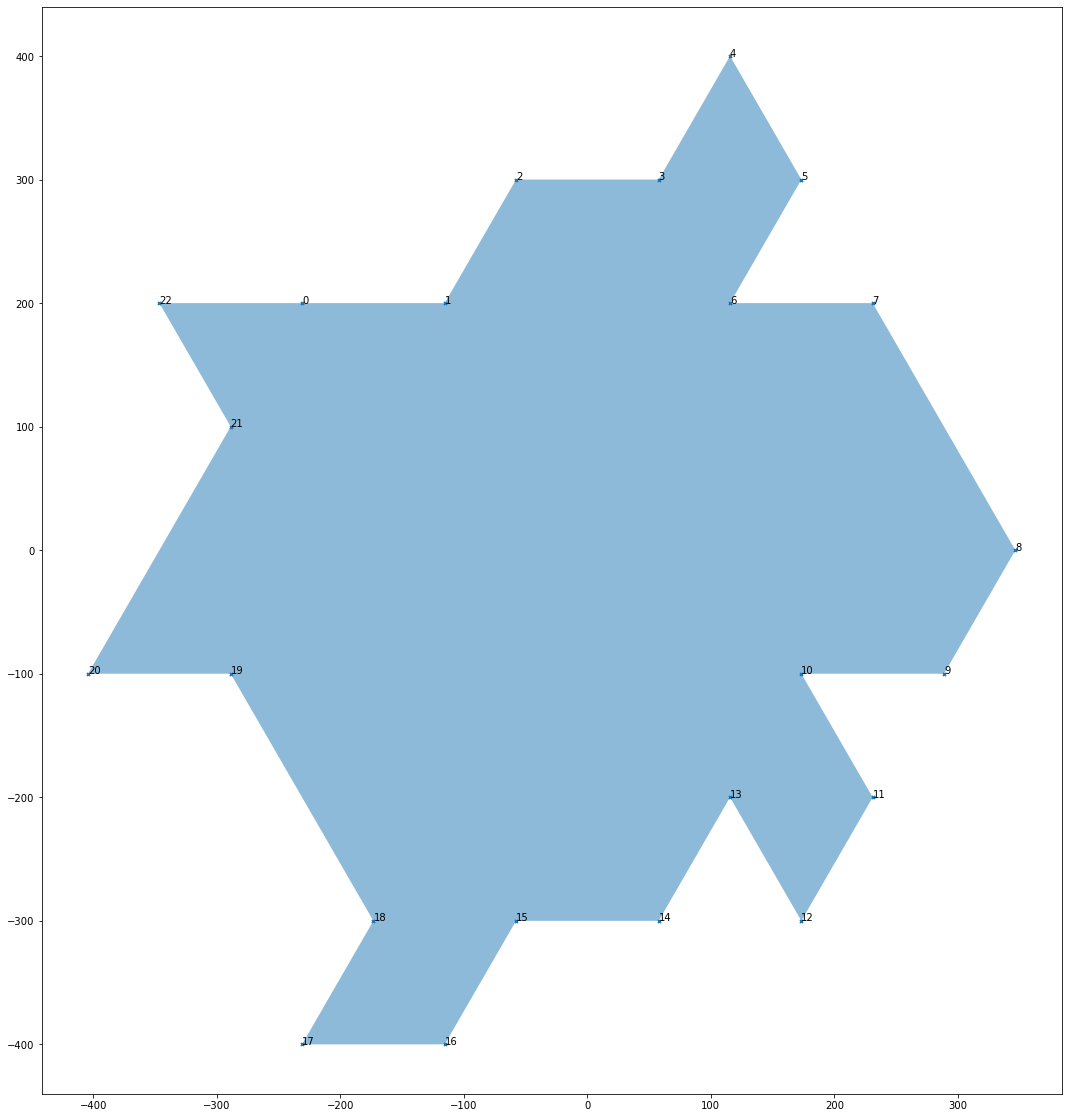

In [4]:
ax = w1.regularised_tile.plot(figsize = (20, 20), alpha = 0.5) 
pts = gpd.GeoSeries([geom.Point(p) 
              for p in w1.regularised_tile.geometry[0].exterior.coords][:-1])
pts.plot(ax = ax, marker = "x", markersize = 10)
for i, p in enumerate(pts):
    ax.annotate(i, (p.x, p.y))

In [8]:
weave1 = Tiling(w1, ak, id_var = "DZ2018")
textile1 = weave1.get_tiled_map(rotation = 20, prioritise_tiles = True)
textile1.variables = [x for x in ak.columns if "Rank" in x]
textile1.colourmaps = dict(zip(textile1.variables,
                               ("BrBG", "RdGy", "RdYlBu", "Spectral","PiYG", "PRGn", "PuOr")))

Only a list of variables specified, assigning to available element_ids.


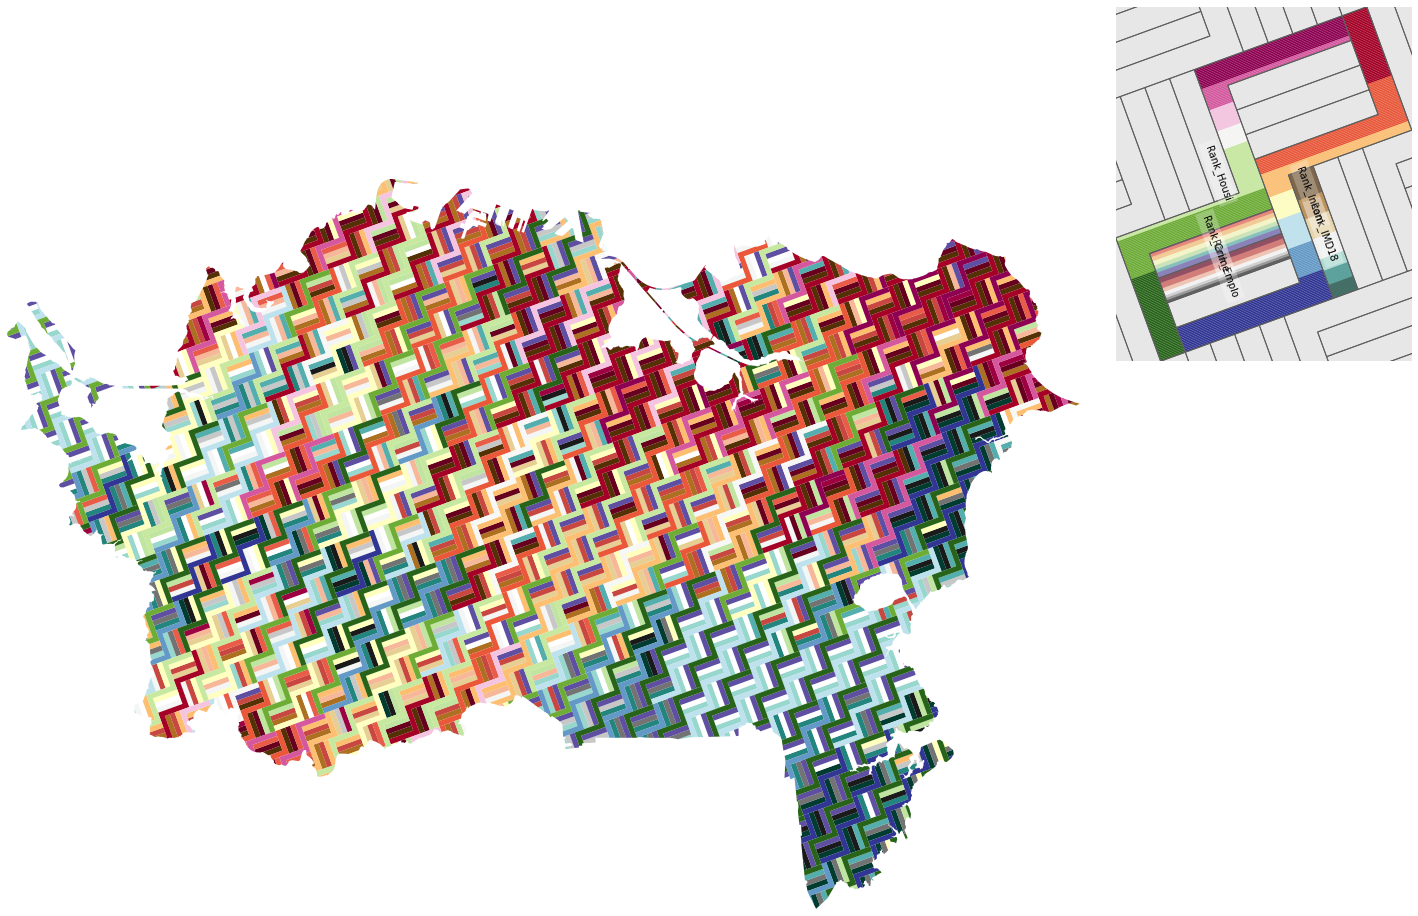

In [9]:
fig = textile1.render(k = 7, scheme = "equalinterval")

In [ ]:
[g.area for g in w1.elements.dissolve(by = "element_id").geometry]